In [1]:
import numpy as np
import matplotlib.pyplot as plt
def ground_state(h,J,k):
    return 2*J*np.sqrt(1+((h/J)**2)-2*(h/J)*np.cos(k))
def u_kv_k(h,J,k):
    theta_k = np.arctan(np.sin(k)/(np.cos(k)-h/J))
    u_k = np.cos(theta_k/2)
    v_k = np.sin(theta_k/2)
    return u_k,v_k

-1.263965383406825


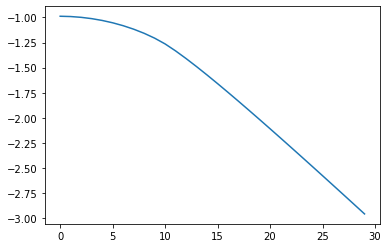

In [18]:
L = 80
n = np.arange(1,L/2+1,1)
k_p = (2*n-1)*np.pi/L

h = 0.01
J = 1.
E_0_ABC = np.zeros(30)
for i in range(30):
 for k in k_p:
    E_0_ABC[i] += -ground_state(h,J,k)
 h += 0.1
plt.plot(E_0_ABC/(L+1))
print(E_0_ABC[10]/(L+1))

In [8]:
import csv
File_name = "Data_MPS/Data_chi_maxkon"+".csv"
with open(File_name, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["energiq="])
    writer.writerow(E_0_ABC/(L+1))


PermissionError: [Errno 13] Permission denied: 'Data_MPS/Data_chi_maxkon.csv'

In [2]:
# Correlation function of Ising model 
def u_kv_k(h,J,k):
    theta_k = np.arctan(np.sin(k)/(np.cos(k)-h/J))
    u_k = np.cos(theta_k/2)
    v_k = np.sin(theta_k/2)
    return np.complex128(u_k),np.complex128(v_k)

In [3]:
d = 10
m = 0
max_j = 11
L = 60
J = 1.
n = np.arange(1,L/2+1,1)
k_p = (2*n-1)*np.pi/L
H = np.arange(0,3.5,0.01)
Correlation = []
for h in H:
  d_p = max_j
  G = np.zeros((d_p-d+1,d_p-d+1)).astype(np.complex128)
  F = np.zeros((d_p-d+1,d_p-d+1)).astype(np.complex128)
  M = np.zeros((d_p-d,d_p-d)).astype(np.complex128)
  Delta = np.eye(d_p-d+1).astype(np.complex128)
  #print(G.shape)
  for i in range(d_p-d+1):
   for n in range(d_p-d+1):
      for k in k_p:
        u,v = u_kv_k(h,J,k)
        G[i,n] += u*u*np.exp(1j*k*(i-n))/L
        F[i,n] += -1j*v*u*np.exp(1j*k*(i-n))/L
  Mo = Delta - 2*(G + F)  
  for i in range(d_p-d):
   for n in range(d_p-d):
        M[i,n] = Mo[i,n+1]
  Correlation.append(np.abs(np.linalg.det(M)))


Text(0.5, 1.0, 'Short range correlation $\\langle\\hat{\\sigma}^x_{i}\\hat{\\sigma}^{x}_{i+1}\\rangle$ for the Ising model with L=60')

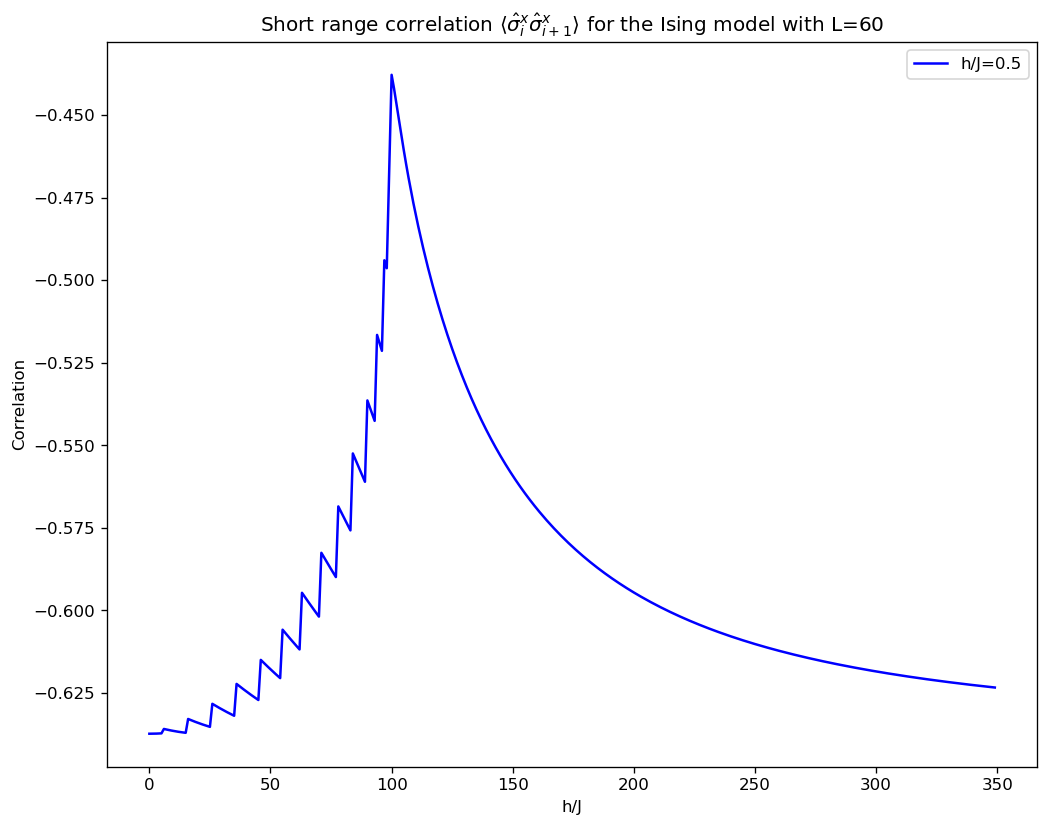

In [74]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=120)
#x = np.arange(2,max_j,1)
plt.plot(-np.abs(Correlation),label="h/J=0.5",color="blue")
#plt.plot(x,np.abs(Correlation[1]),label="h/J=1.",color = "green")
#plt.plot(x,np.abs(Correlation[2]),label="h/J=2.",color = "orange")
plt.legend()
plt.xlabel("h/J")
plt.ylabel("Correlation")
plt.title(r"Short range correlation $\langle\hat{\sigma}^x_{i}\hat{\sigma}^{x}_{i+1}\rangle$ for the Ising model with L=60")

In [13]:
d = 1
m = 0
J = 1.
l = 0
Dimensions = np.arange(3,81,2)
H = np.array([0.5,1.,2.])
Correlation = np.zeros((3,len(Dimensions))).astype(np.complex128)
for N in Dimensions:
 ni = np.arange(1,N/2+1,1).astype(np.complex128)
 k_p = (2*ni-1)*np.pi/N
 d_p = N//2
 print(d_p)
 m = 0
 for h in H:
  G = np.zeros((d_p-d+1,d_p-d+1)).astype(np.complex128)
  F = np.zeros((d_p-d+1,d_p-d+1)).astype(np.complex128)
  M = np.zeros((d_p-d,d_p-d)).astype(np.complex128)
  Delta = np.eye(d_p-d+1).astype(np.complex128)

  for i in range(d_p-d+1):
   for n in range(d_p-d+1):
      for k in k_p:
        u,v = u_kv_k(h,J,k)
        G[i,n] += u*u*np.exp(1j*k*(i-n))/N
        F[i,n] += -1j*v*u*np.exp(1j*k*(i-n))/N
  Mo = Delta - 2*(G + F)  
  for i in range(d_p-d):
   for n in range(d_p-d):
        M[i,n] = Mo[i,n+1]
  Correlation[m][l]=np.abs(np.linalg.det(M))
  m+=1
  #print(m)
 l+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


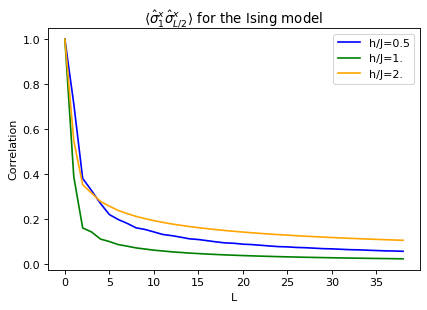

In [14]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.plot(Correlation[0].real,label="h/J=0.5",color="blue")
plt.plot(Correlation[1].real,label="h/J=1.",color = "green")
plt.plot(Correlation[2].real,label="h/J=2.",color = "orange")
plt.xlabel("L")
plt.ylabel("Correlation")
plt.title(r"$\langle\hat{\sigma}^x_{1}\hat{\sigma}^{x}_{L/2}\rangle$ for the Ising model")
plt.legend()


[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79]


C:\Users\hgton\AppData\Local\Temp/ipykernel_15468/1646651197.py:7: RuntimeWarning: overflow encountered in power
  return (1/x**a)*np.exp(-b*x)
C:\Users\hgton\AppData\Local\Temp/ipykernel_15468/1646651197.py:7: RuntimeWarning: overflow encountered in exp
  return (1/x**a)*np.exp(-b*x)
C:\Users\hgton\AppData\Local\Temp/ipykernel_15468/1646651197.py:7: RuntimeWarning: invalid value encountered in multiply
  return (1/x**a)*np.exp(-b*x)


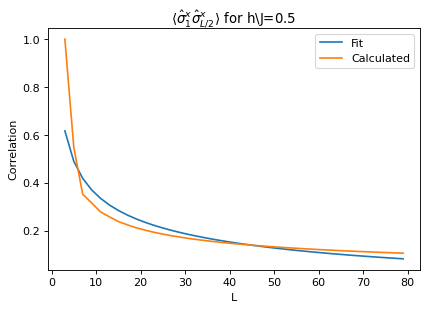

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
x = np.arange(1,len(Correlation[2].real)+1,2)
x = Dimensions
print(x)
def exp(x,a,b):
    return (1/x**a)*np.exp(-b*x)
popt, pcov = curve_fit(exp,x, Correlation[2].real)
figure(figsize=(6, 4), dpi=80)
plt.plot(x, exp(x, *popt),label = "Fit")
plt.plot(x, Correlation[2].real,label = "Calculated")
plt.xlabel("L")
plt.ylabel("Correlation")
plt.title(r"$\langle\hat{\sigma}^x_{1}\hat{\sigma}^{x}_{L/2}\rangle$ for h\J=0.5")
plt.legend()

[2.86906355 1.95231416]
1.9523141645108029


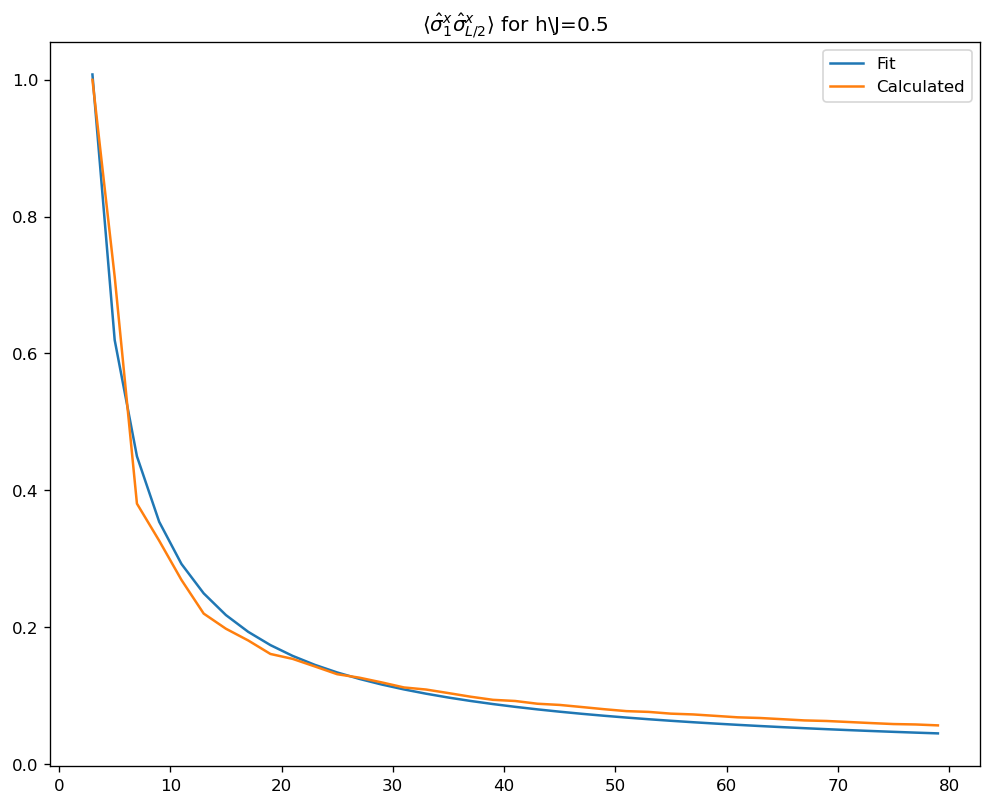

In [16]:
def power_law(x,a,n):
    return  a*1/(x**(-1+n))
popt, pcov = curve_fit(power_law,x, Correlation[0].real)
print(popt)
figure(figsize=(10, 8), dpi=120)
plt.plot(x, power_law(x, *popt),label = "Fit")
plt.plot(x, Correlation[0].real,label = "Calculated")
plt.title(r"$\langle\hat{\sigma}^x_{1}\hat{\sigma}^{x}_{L/2}\rangle$ for h\J=0.5")
plt.legend()
print(popt[1])